     Te_K    Tc_K  superheat_K  subcool_K             h1            h2s  \
0  273.15  308.15          0.0        0.0  398603.453628  421623.557134   
1  273.15  308.15          0.0        2.5  398603.453628  421623.557134   
2  273.15  308.15          0.0        5.0  398603.453628  421623.557134   
3  273.15  308.15          0.0        7.5  398603.453628  421623.557134   
4  273.15  308.15          0.0       10.0  398603.453628  421623.557134   

              h2             h3             Qe            Wc       COP  \
0  429296.924969  249006.651856  149596.801772  30693.471342  4.873896   
1  429296.924969  245350.440950  153253.012678  30693.471342  4.993017   
2  429296.924969  241722.392309  156881.061319  30693.471342  5.111219   
3  429296.924969  238121.229641  160482.223986  30693.471342  5.228546   
4  429296.924969  234545.776695  164057.676933  30693.471342  5.345035   

              P1             P3  
0  292803.182339  886980.983608  
1  292803.182339  886980.983608  
2 

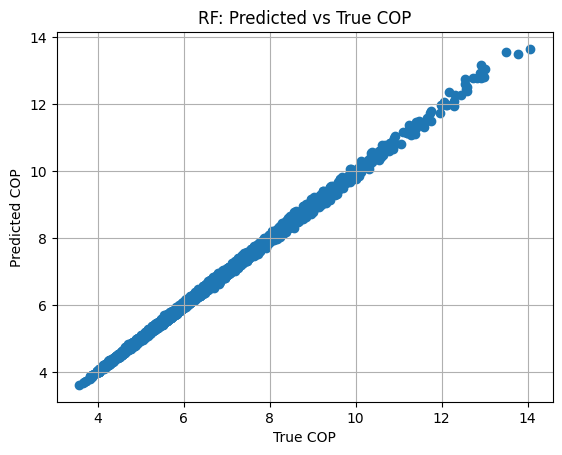

In [ ]:
# ============================================================
# 1. Load dataset
# ============================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib
import matplotlib.pyplot as plt

df = pd.read_csv("/content/r134a_cycle_data.csv")
print(df.head())
print(df.columns)

# ============================================================
# 2. Define Inputs (X) and Output (y)
# ============================================================

# Inputs available from dataset
X = df[[
    "Te_K",          # evaporator temp
    "Tc_K",          # condenser temp
    "superheat_K",   # SH
    "subcool_K",     # SC
    "P3"             # condenser pressure (control variable)
]]

# Target
y = df["COP"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ============================================================
# 3. Train Random Forest
# ============================================================
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=4,
    random_state=42
)

rf.fit(X_train, y_train)

# ============================================================
# 4. Evaluate
# ============================================================
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n=== Random Forest Performance ===")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R2   = {r2:.4f}")

# ============================================================
# 5. Save model
# ============================================================
joblib.dump(rf, "rf_cop_model.pkl")
print("\nModel saved as rf_cop_model.pkl")

# ============================================================
# 6. Plot predicted vs actual COP
# ============================================================
plt.scatter(y_test, y_pred)
plt.xlabel("True COP")
plt.ylabel("Predicted COP")
plt.title("RF: Predicted vs True COP")
plt.grid()
plt.show()
